In [1]:
import TCC_supercon_dados as tsd
import TCC_supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Dividindo conjuntos de dados   ###

In [3]:
### Divisão em conjunto de treino e teste   ###

X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

### Normalizando os conjuntos submetidos a treinamento e testagem (como recomendado no modelo)   ###

X_padrao = StandardScaler().fit(X_treino)
X_p_treino = X_padrao.transform(X_treino)
X_p_teste = X_padrao.transform(X_teste)

In [8]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [9]:
###   Treinando e obtendo hiperparmatros polinomiais sobre o modelo SVM   ###

In [10]:
###   Parâmetros polinomiais a serem avalizados   ###

parametros3 = [{'degree':[2,3,4,5],'C':[1,10,100,250,500],'epsilon':[.01,.1,1,10]}]

In [11]:
###   Chamando a classe para o processo   ###

svr_poly = SVR(kernel='poly')

In [12]:
### Processo de validação cruzada (busca de parâmetros)   ###

resultados3 = tsf.obter_parametros(svr_poly, parametros3, X_p_treino,Y_treino)

C:\Users\muril\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
###    Imprime a classe do modelo com os melhores parâmetros calculados   ###

resultados3.best_estimator_

SVR(C=500, cache_size=200, coef0=0.0, degree=2, epsilon=1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
###   Treina o modelo com os melhores prâmetros   ###

svr_poly = SVR(C=500, cache_size=200, coef0=0.0, degree=2, epsilon=1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
svr_poly.fit(X_p_treino,Y_treino)

SVR(C=500, cache_size=200, coef0=0.0, degree=2, epsilon=1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
###   Imprime o resultado dos os dados treinados   ###

print('\n R^2: \n', svr_poly.score(X_p_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(svr_poly.predict(X_p_treino),Y_treino)))


 R^2: 
 0.8197691380597867 
 RMSE : 
 14.522751132423277


In [6]:
###   Imprime o resultado sobre dados nunca treinados   ###

print('\n R^2: \n', svr_poly.score(X_p_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(svr_poly.predict(X_p_teste),Y_teste)))


 R^2: 
 0.8203993628025525 
 RMSE : 
 14.46050051786365


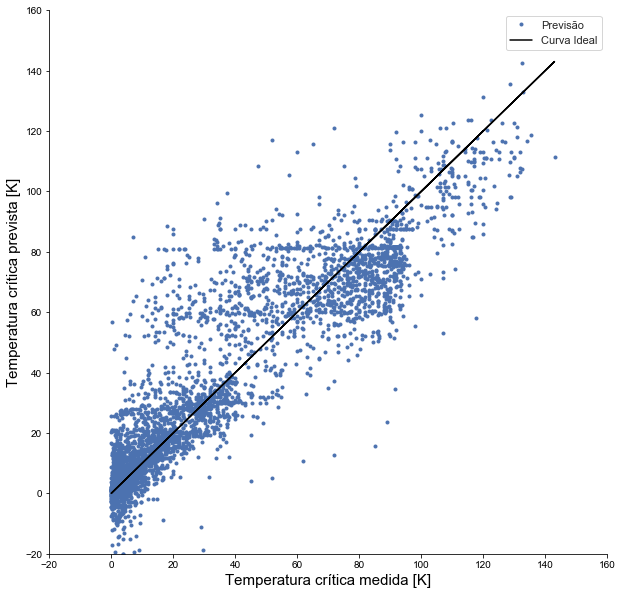

In [7]:
###   Visualização dos resultados de treinamento sobre dados nunca treinados pelo modelo   ###

print_x = Y_teste
print_y = svr_poly.predict(X_p_teste)

f, ax = plt.subplots(figsize=(10, 10))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(-20, 160, 10, endpoint=True))
plt.yticks(np.linspace(-20, 160, 10, endpoint=True))
plt.axis([-20,160,-20,160])

plt.show()

In [18]:
###   Treinando e obtendo hiperparmatros polinomiais sobre o modelo SVM   ###

In [19]:
###   Parâmetros rbf a serem avalizados   ###

parametros = [{'degree':[2,3],'C':[100,500,600,700,1000],'epsilon':[.01,.1,1,10]}]

In [20]:
###   Chamando a classe para o processo   ###

svr_rbf = SVR(gamma = 'auto')

In [21]:
### Processo de validação cruzada (busca de parâmetros)   ###

resultados = tsf.obter_parametros(svr_rbf, parametros, X_p_treino,Y_treino)

C:\Users\muril\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [22]:
###    Imprime a classe do modelo com os melhores parâmetros calculados   ###

resultados.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=2, epsilon=10, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
###   Treina o modelo com os melhores prâmetros   ###

svr_rbf = SVR(C=1000, cache_size=200, coef0=0.0, degree=2, epsilon=10, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_rbf.fit(X_p_treino,Y_treino)

SVR(C=1000, cache_size=200, coef0=0.0, degree=2, epsilon=10, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
###   Imprime o resultado dos os dados treinados   ###

print('\n R^2: \n', svr_rbf.score(X_p_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(svr_rbf.predict(X_p_treino),Y_treino)))


 R^2: 
 0.8807340238599336 
 RMSE : 
 11.813881188194518


In [10]:
###   Imprime o resultado sobre dados nunca treinados   ###

print('\n R^2: \n', svr_rbf.score(X_p_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(svr_rbf.predict(X_p_teste),Y_teste)))


 R^2: 
 0.8690679838128221 
 RMSE : 
 12.34674039082913


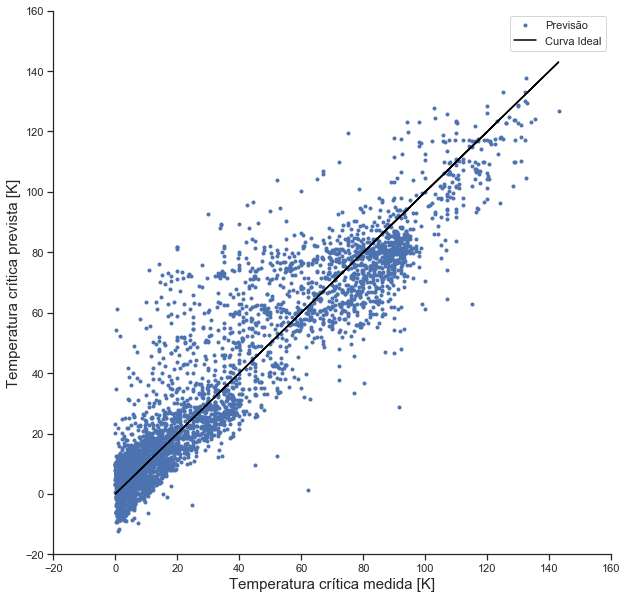

In [11]:
###   Visualização dos resultados de treinamento sobre dados nunca treinados pelo modelo   ###

print_x = Y_teste
print_y = svr_rbf.predict(X_p_teste)

f, ax = plt.subplots(figsize=(10, 10))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(-20, 160, 10, endpoint=True))
plt.yticks(np.linspace(-20, 160, 10, endpoint=True))
plt.axis([-20,160,-20,160])

plt.show()

In [28]:
###   Treinando e obtendo hiperparmatros lineares sobre o modelo SVM   ###

In [29]:
###   Chamando a classe para o processo   ###

svm_reg = LinearSVR()

In [30]:
###   Parâmetros rbf a serem avalizados   ###

parametros2 = [{'C':[.001,.1,1,10,100],'epsilon':[.001,.1,1,10,100]}]

In [31]:
### Processo de validação cruzada (busca de parâmetros)   ###

resultados2 = tsf.obter_parametros(svm_reg, parametros2, X_p_treino,Y_treino)

C:\Users\muril\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
###    Imprime a classe do modelo com os melhores parâmetros calculados   ###

resultados2.best_params_

{'C': 100, 'epsilon': 10}

In [12]:
###   Treina o modelo com os melhores prâmetros   ###

svm_reg = LinearSVR(C= 100, epsilon= 10)
svm_reg.fit(X_p_treino,Y_treino)

C:\Users\muril\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=100, dual=True, epsilon=10, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [13]:
###   Imprime o resultado dos os dados treinados   ###

print('\n R^2: \n', svm_reg.score(X_p_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(svm_reg.predict(X_p_treino),Y_treino)))


 R^2: 
 0.7225711058046868 
 RMSE : 
 18.0181484516226


In [14]:
###   Imprime o resultado dos os dados não treinados   ###

print('\n R^2: \n', svm_reg.score(X_p_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(svm_reg.predict(X_p_teste),Y_teste)))


 R^2: 
 0.7397634566545359 
 RMSE : 
 17.406583173688105


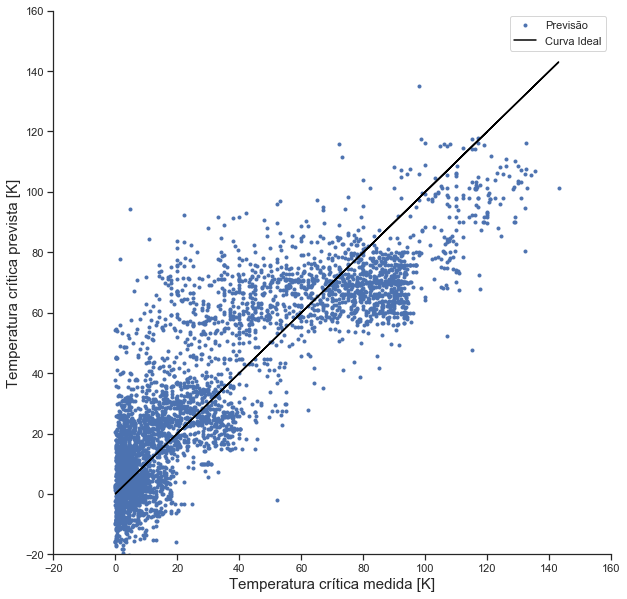

In [15]:
###   Visualização dos resultados de treinamento sobre dados nunca treinados pelo modelo   ###

import matplotlib.pyplot as plt

print_x = Y_teste
print_y = svm_reg.predict(X_p_teste)

f, ax = plt.subplots(figsize=(10, 10))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(-20, 160, 10, endpoint=True))
plt.yticks(np.linspace(-20, 160, 10, endpoint=True))
plt.axis([-20,160,-20,160])

plt.show()